<a href="https://colab.research.google.com/github/korven2409/Korada-Venkatesh/blob/main/Minor_Project_Cross_selling(Modified).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
1+1

2

In [2]:
#importing drive from google.colab
from google.colab import drive

mounting drive with google colab

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing pandas as pd

In [4]:
import pandas as pd

reading dataset into dataframe 

In [5]:
df_dataset=pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

displaying the shape of the dataframe

In [6]:
df_dataset.shape

(381109, 12)

applying groupby with respect to Respone which is the target column to know how the data is distributed among the classes

In [7]:
df_dataset.groupby(['Response']).count()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
Response,,,,,,,,,,,
0,334399,334399,334399,334399,334399,334399,334399,334399,334399,334399,334399
1,46710,46710,46710,46710,46710,46710,46710,46710,46710,46710,46710


displaying the info of the dataframe

In [8]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


finding how much the independent features are related with the dependent feature(Respone), note that .corr() method only finds correlation with independent feature which are numerical

In [9]:
df_dataset.corr()['Response']

id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

displaying all the columns 

In [10]:
df_dataset.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

displaying only the numerical features

In [11]:
df_dataset.describe().columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

reading the test data set

In [12]:
df_dataset_test=pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

displaying the test data set

In [13]:
df_dataset_test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


extracting 2 from the string '> 2 years'

In [14]:
x='> 2 years'
x=int(x.split(' ')[1])
print(x)

2


checking the data type of extracted part , and found out its int type

In [15]:
type(x)

int

Storing a copy of dataset into multiple data frames for backup purposes

In [16]:
df1=df_dataset
df2=df_dataset
df3=df_dataset

checking if dataframes are correctly read or not

In [17]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [18]:
df2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


extracting the numerical part from the string values of the Vehicle_Age feature and replacing them with the extracted part respectively

In [19]:
for i in range(df1['Vehicle_Age'].shape[0]):
  if '-' in df1['Vehicle_Age'].values[i]:
    y=df1['Vehicle_Age'].values[i].split('-')
    z=int(y[0])
    # print(z)
    y=y[1].split(' ')
    m=int(y[0])
    # print(m)
    avg=(m+z)/2
    df1['Vehicle_Age'].values[i]=avg
  else:
    # x='> 2 years'
    x=int(df1['Vehicle_Age'].values[i].split(' ')[1])
    df1['Vehicle_Age'].values[i]=x
    # print(x)

displaying the shape of target feature

In [20]:
df1['Response'].shape[0]

381109

here we can see that the previously string values of Vehicle_Age feature are now replaced with the numerical part

In [21]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


again storing the multiple copies of modified data frame

In [22]:
df2=df1
df3=df1
df4=df1

In [23]:
df2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


Checking if any null values are present or not

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Here we can see that even though replacing Vehicle_Age with numerical values , in dtypes() its still showing Vehicle_Age is of object datatype

In [25]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

displaying the dataframe

In [26]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


converting the datatype of Vehicle_Age from object into float type

In [27]:
df1['Vehicle_Age']=df1['Vehicle_Age'].astype(float)

Successfully changed

In [28]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


Now we can see that the datatype is changed from object to flaot

In [29]:
df1.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age             float64
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Groupby Gender 

In [30]:
df1.groupby(['Gender']).count()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,,,,
Female,175020,175020,175020,175020,175020,175020,175020,175020,175020,175020,175020
Male,206089,206089,206089,206089,206089,206089,206089,206089,206089,206089,206089


Groupby Vehicle_Damage

In [31]:
df1.groupby(['Vehicle_Damage']).count()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Vehicle_Damage,,,,,,,,,,,
No,188696,188696,188696,188696,188696,188696,188696,188696,188696,188696,188696
Yes,192413,192413,192413,192413,192413,192413,192413,192413,192413,192413,192413


finding correlation b/w Response and rest all independent features

In [32]:
df1.corr()['Response']

id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Vehicle_Age             0.221874
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

displaying dataframes df2, df3 and df_dataset

In [33]:
df2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


In [34]:
df3

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


In [35]:
df_dataset

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


In [36]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


installing imbalanced-learn inorder to balance the unbalanced data

In [37]:
pip install imbalanced-learn

checking if installation was successful or not

In [38]:
from imblearn.base import BaseSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Here we can see that the target feature is unbalanced

In [39]:
df1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

describing the dataframe, and we can see that there are outliers in Annual_Premium

In [40]:
df1.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,1.304808,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,0.283720,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,1.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,1.500000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,1.500000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,2.000000,540165.000000,163.000000,299.000000,1.000000


Dropping the id feature because it is related with target feature with only 0.01%

In [41]:
df1.drop(['id'],axis=1,inplace=True)

We can see the id feature is successfuly dropped

In [42]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2.0,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2.0,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,1.0,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,1.0,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1.5,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,1.0,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,1.0,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,2.0,Yes,44617.0,124.0,74,0


Plotting the boxplot of Annual_Premium inorder to display the outliers

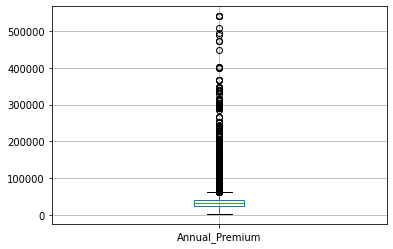

In [43]:
df1.boxplot(column=['Annual_Premium'])

Plotting the boxplot of Policy_Sales_Channel inorder to display the outliers

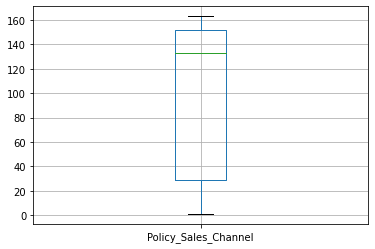

In [44]:
df1.boxplot(column=['Policy_Sales_Channel'])

Plotting the boxplot of Vehicle_Age inorder to display the outliers

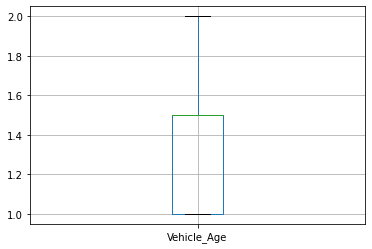

In [45]:
df1.boxplot(column=['Vehicle_Age'])

Checking the correlation b/w target(Response) and independent features

In [46]:
df1.corr()['Response']

Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Vehicle_Age             0.221874
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

describe().columns gives numerical features

In [47]:
df1.describe().columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Response'],
      dtype='object')

.columns gives all features

In [48]:
df1.columns


Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

by subtracting numerical features from all columns we will be left with only categorical columns , we do this inorder to label encode them 

In [49]:
cat_cols=list(set(df1.columns)-set(df1.describe().columns))

We get two categorical features

In [50]:
cat_cols

['Gender', 'Vehicle_Damage']

importing label encoder from sklearn.preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder

label encoding the categorical features inorder to convert them from categorical to numerical features

In [52]:
for each_cat in cat_cols:
  le=LabelEncoder()
  df1[each_cat]=le.fit_transform(df1[each_cat])

We can see that label encoding was succesfull

In [53]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2.0,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1.5,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2.0,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1.0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1.0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1.5,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1.0,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1.0,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2.0,1,44617.0,124.0,74,0


Now all features are of numerical type

In [54]:
df1.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age             float64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Since Annual_Premium is poorly related with target feature with only 2% correlation we can drop that feature

In [55]:
df1.corr()['Response']

Gender                  0.052440
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Vehicle_Age             0.221874
Vehicle_Damage          0.354400
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

dropping Annual_Premium feature

In [56]:
df1.drop(['Annual_Premium'],inplace=True,axis=1)

Successfully dropped Annual_Premium

In [57]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2.0,1,26.0,217,1
1,1,76,1,3.0,0,1.5,0,26.0,183,0
2,1,47,1,28.0,0,2.0,1,26.0,27,1
3,1,21,1,11.0,1,1.0,0,152.0,203,0
4,0,29,1,41.0,1,1.0,0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1.5,0,26.0,88,0
381105,1,30,1,37.0,1,1.0,0,152.0,131,0
381106,1,21,1,30.0,1,1.0,0,160.0,161,0
381107,0,68,1,14.0,0,2.0,1,124.0,74,0


Remaining all features have decent correlation with the target feature

In [58]:
df1.corr()['Response']

Gender                  0.052440
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Vehicle_Age             0.221874
Vehicle_Damage          0.354400
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Response                1.000000
Name: Response, dtype: float64

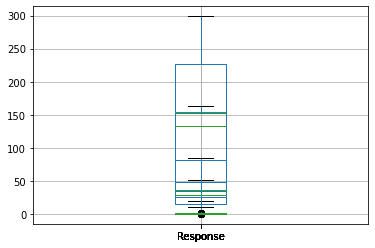

In [59]:
for each_col in df1.columns:
  df1.boxplot(column=each_col)
  # print(each_col)

In [60]:
type(df1.columns)

pandas.core.indexes.base.Index

no outliers in Gender feature

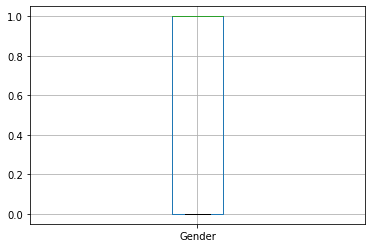

In [61]:
df1.boxplot(column='Gender')

no outliers in Age feature

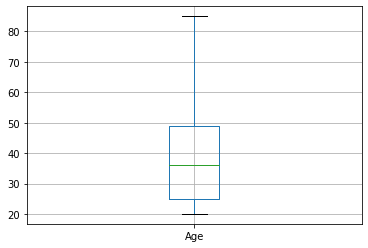

In [62]:
df1.boxplot(column='Age')

no outliers in Driving_License feature

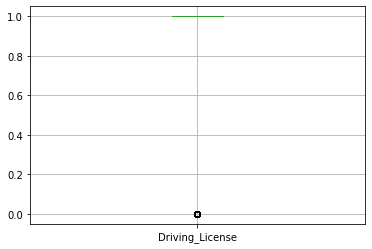

In [63]:
df1.boxplot(column='Driving_License')

no outliers in Region_Code feature

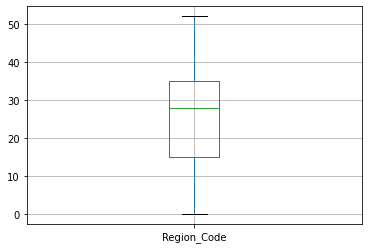

In [64]:
df1.boxplot(column='Region_Code')

no outliers in Previously_Insured feature

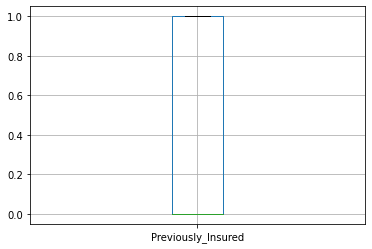

In [65]:
df1.boxplot(column='Previously_Insured')

no outliers in Vehicle_Age feature

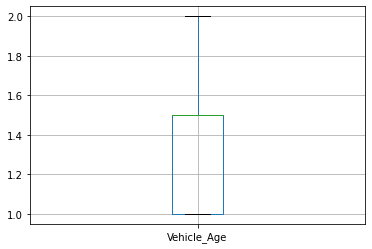

In [66]:
df1.boxplot(column='Vehicle_Age')

no outliers in Vehicle_Damage feature

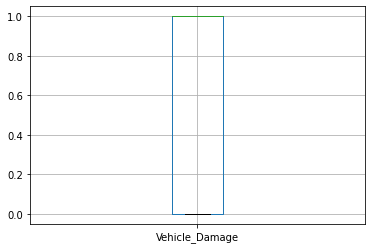

In [67]:
df1.boxplot(column='Vehicle_Damage')

no outliers in Policy_Sales_Channel feature

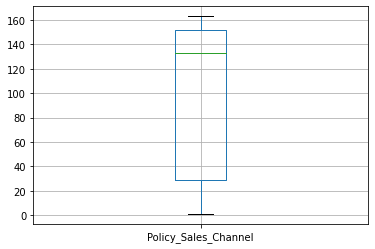

In [68]:
df1.boxplot(column='Policy_Sales_Channel')

no outliers in Vintage feature

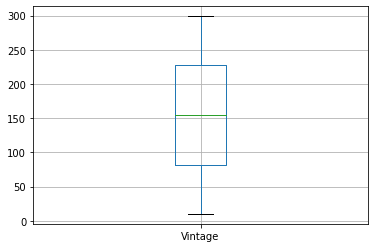

In [69]:
df1.boxplot(column='Vintage')

Imbalanced target feature

In [70]:
df1['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

creating multiple X's and y's which has all independent features and target feature respectively

In [71]:
import numpy as np
#predict = "Response"
X1 = np.array(df1.drop("Response",axis=1))
y1 = np.array(df1["Response"])
X2 = np.array(df1.drop("Response",axis=1))
y2 = np.array(df1["Response"])
X3 = np.array(df1.drop("Response",axis=1))
y3 = np.array(df1["Response"])

displaying shape of all 

In [72]:
X1.shape

(381109, 9)

In [73]:
y1.shape[0]

381109

In [74]:
X2.shape

(381109, 9)

In [75]:
y2.shape[0]

381109

importing train_test_split from sklearn.model_selection and splitting

In [76]:
from sklearn.model_selection import train_test_split
seed = 7
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=seed)

shape of X1.train

In [77]:
X1_train.shape

(266776, 9)

In [78]:
df1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2.0,1,26.0,217,1
1,1,76,1,3.0,0,1.5,0,26.0,183,0
2,1,47,1,28.0,0,2.0,1,26.0,27,1
3,1,21,1,11.0,1,1.0,0,152.0,203,0
4,0,29,1,41.0,1,1.0,0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1.5,0,26.0,88,0
381105,1,30,1,37.0,1,1.0,0,152.0,131,0
381106,1,21,1,30.0,1,1.0,0,160.0,161,0
381107,0,68,1,14.0,0,2.0,1,124.0,74,0


importing RandomOverSampler from imblearn.over_sampling inorder to perform oversampling to balance the data

In [79]:
from imblearn.over_sampling import RandomOverSampler

importing counter from collection inorder to count the no.of records before and after oversampling

In [80]:
from collections import Counter

oversampling class 1 by 50% of that of class 0

In [81]:
os=RandomOverSampler(0.5)
X_train_os,y_train_os=os.fit_sample(X1_train,y1_train)
print(f"count of classes before oversampling is {Counter(y1_train)}")
print(f"count of classes before oversampling is {Counter(y_train_os)}")

count of classes before oversampling is Counter({0: 233970, 1: 32806})
count of classes before oversampling is Counter({0: 233970, 1: 116985})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [82]:
X1_train.shape[0]+X1_test.shape[0]

381109

In [83]:
y1_train.shape[0]+y1_test.shape[0]

381109

In [84]:
y1_train.shape[0]

266776

importing logistic regression from sklearm.linear_model

In [85]:
from sklearn.linear_model import LogisticRegression

importing accuracy score from sklearn.metrics to print the accuracy of that model

In [86]:
from sklearn.metrics import accuracy_score

training the logisticRegression model

In [87]:
model1=LogisticRegression(max_iter=10000)
model1.fit(X_train_os,y_train_os)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting and printing the accuracy score

In [88]:
y_predict = model1.predict(X1_test)
model_score = accuracy_score(y1_test,y_predict)
print(model_score)

0.7560546823751673


Now we oversample by 80%

In [89]:
os=RandomOverSampler(0.80)
X_train_os1,y_train_os1=os.fit_sample(X1_train,y1_train)
print(f"count of classes before oversampling is {Counter(y1_train)}")
print(f"count of classes before oversampling is {Counter(y_train_os1)}")

count of classes before oversampling is Counter({0: 233970, 1: 32806})
count of classes before oversampling is Counter({0: 233970, 1: 187176})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


training the model

In [90]:
model2=LogisticRegression(max_iter=10000)
model2.fit(X_train_os1,y_train_os1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediction of the 80% oversampled model which is very less than that of which was 50% oversampled

In [91]:
y_predict1 = model2.predict(X1_test)
model_score1 = accuracy_score(y1_test,y_predict1)
print(model_score1)

0.6422905023046714


Hyperparameter tuning for random forest classifier

In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] 
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Now we import RandomForestClassifier from sklearn.ensemble and training the model with the data which was 50% oversampled

In [93]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
# classifier.fit(X_train_os,y_train_os)

In [94]:
from sklearn.model_selection import RandomizedSearchCV
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 1)

In [95]:
import warnings
warnings.filterwarnings("ignore")
classifier_random.fit(X_train_os,y_train_os)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=  53.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   53.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.0min
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.4min
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.5min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.5min
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 104.1min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [96]:
classifier_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

prediction accuracy 

In [97]:
y_pred=classifier_random.predict(X1_test)
print(accuracy_score(y1_test,y_pred))

0.8338624893950128


Now training the model with data which was 80% oversampled and we can observe that 50% oversampled model is better than the 80% oversampled model by a very small difference

In [109]:
classifier1=RandomForestClassifier()
classifier1.fit(X_train_os1,y_train_os1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

prediction accuracy

In [110]:
y_pred1=classifier1.predict(X1_test)
print(accuracy_score(y1_test,y_pred1))

0.8311073793218056


In [101]:
# names = ['linear', 'rbf', 'poly', 'sigmoid']
# for kernel_name in names:
#     if kernel_name=='poly':
#         classifier = SVC(kernel=kernel_name,degree=15)
#     else:
#       classifier = SVC(kernel=kernel_name)
#     classifier.fit(X_train_os,y_train_os)
#     y_pred=classifier.predict(X1_test)
#     print(f"following prediciton is done by {kernel_name}\n")
#     print("confusion matrix:")
#     print(confusion_matrix(y_test,y_pred))
#     print("classification report:")
#     print(classification_report(y_test,y_pred))
#     print("accuracy:")
#     print(accuracy_score(y1_test,y_pred))
#     print("-------------------------------------")

Importing KNN classifier from sklearn.neighbors

In [102]:
from sklearn.neighbors import KNeighborsClassifier

Creating object of KNN classifier with n_neighbors=20 and weights='distance'

In [103]:
NNH = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )

Training the KNN model over 50% oversampled data

In [104]:
NNH.fit(X_train_os,y_train_os)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

Predicting labels and storing them into predicted_labels variable and then displaying the accuracy score

In [105]:
predicted_labels = NNH.predict(X1_test)
print(accuracy_score(y1_test,predicted_labels))

0.7658856148268653
